In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score ,roc_auc_score, roc_curve, classification_report,accuracy_score, confusion_matrix, auc,precision_score 

In [56]:
base_full = pd.read_csv('C:\\Users\\flavi\\Google Drive\\Estudos\\Formação em Data Science\\Estudos\\Classificacao\\Bases\\diabetes.csv')
base_full.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age = Age (years)

Outcom = Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Data Prep:
- analisar se existes dados fautantes
- analisar ver a distribuição dos dados
- analisar o balanceamento das classes

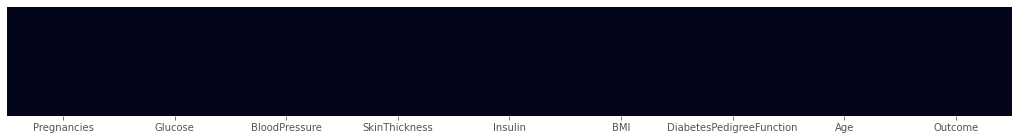

In [57]:
plt.figure(figsize=(18,2))
sns.heatmap(base_full.isnull(), cbar=False, yticklabels=False);

In [58]:
base_full.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
base_full.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [60]:
def standarscaler(df, lista):
    stderscaler = StandardScaler()
    for item in lista:
        df[[item]] = stderscaler.fit_transform(df[[item]])
    return df

In [63]:
def MinMaxSc(df, lista):
    Minmax = MinMaxScaler()
    for item in lista:
        df[[item]] = Minmax.fit_transform(df[[item]])
    return df

In [61]:
lista = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df_result_StandScaler = standarscaler(base_full,lista)
df_result_StandScaler.describe()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1

In [64]:
lista = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df_normal = MinMaxSc(df_result_StandScaler, lista)
df_normal.describe()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1

In [66]:
df_normal.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

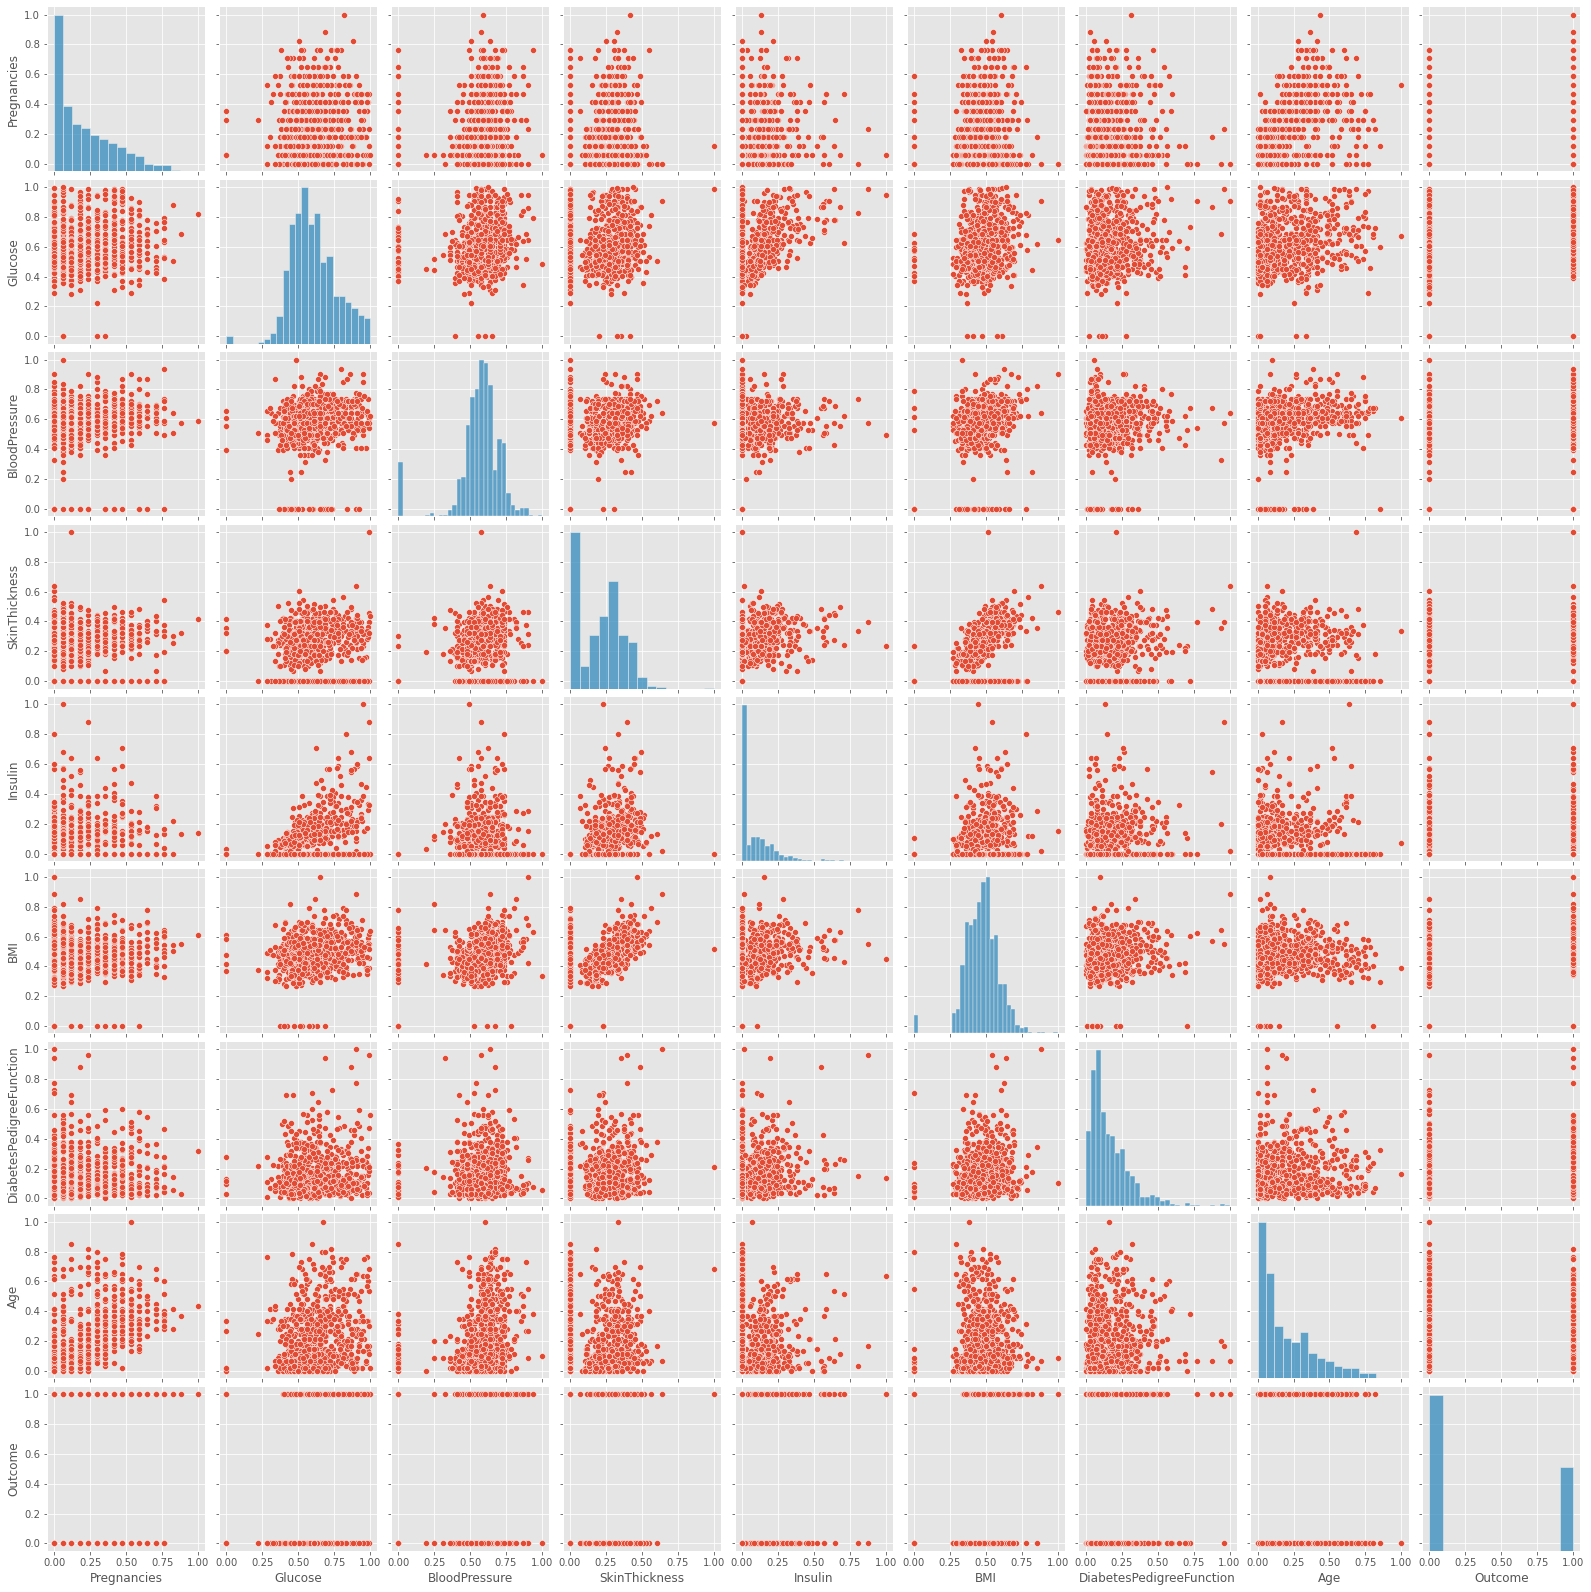

In [67]:
#x = df_normal.iloc[:,0:8]
#y = df_normal.iloc[:,8:9]

#sns.pairplot(df_result_StandScaler)
#plt.show()

#sns.pairplot(df_normal)
#plt.show()

sns.pairplot(base_full)
plt.show()

Class 0: 500
Class 1: 268
Proporção de Desbalanceamento: a base possui  1.87  Class 0, para  1.0 Class 1.


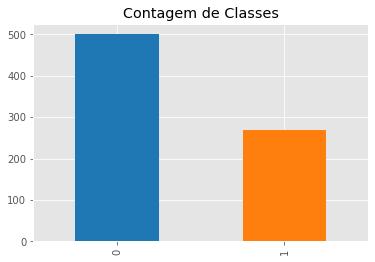

In [156]:
target_count = df_normal.Outcome.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proporção de Desbalanceamento: a base possui ', round(target_count[0] / target_count[1], 2), ' Class 0, para  1.0 Class 1.')
target_count.plot(kind='bar', title='Contagem de Classes',color = ['#1F77B4', '#FF7F0E']);

In [71]:
#CONTAR AS CLASSIFICACOES
count_class_0, count_class_1 = df_normal.Outcome.value_counts()

#DIVIDE O DATA FRAME POR CLASSIFICACAO
df_class_0 = df_normal[df_normal['Outcome'] == 0]
df_class_1 = df_normal[df_normal['Outcome'] == 1]

Random under-sampling:
1    268
0    268
Name: Outcome, dtype: int64


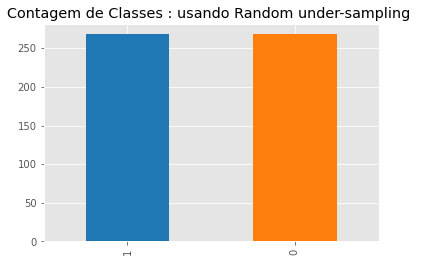

In [157]:
#EQUALIZANDO A BASE POR UNDER SAMPLING
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())

df_test_under.Outcome.value_counts().plot(kind='bar', title='Contagem de Classes : usando Random under-sampling ',color = ['#1F77B4', '#FF7F0E']);

Random over-sampling:
1    500
0    500
Name: Outcome, dtype: int64


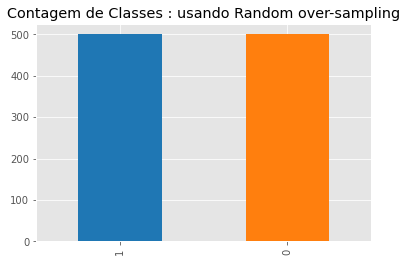

In [158]:
#EQUALIZANDO A BASE POR OVER SAMPLING
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Contagem de Classes : usando Random over-sampling',color = ['#1F77B4', '#FF7F0E']);

In [74]:
df_test_over.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
1      0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
3      0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
5      0.294118  0.582915       0.606557       0.000000  0.000000  0.381520   
7      0.588235  0.577889       0.000000       0.000000  0.000000  0.526080   
10     0.235294  0.552764       0.754098       0.000000  0.000000  0.560358   

    DiabetesPedigreeFunction       Age  Outcome  
1                   0.116567  0.166667        0  
3                   0.038002  0.000000        0  
5                   0.052519  0.150000        0  
7                   0.023911  0.133333        0  
10                  0.048249  0.150000        0

### Analisando a base original -  Sem Normalização e Sem Pradonização

****************************************************************
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       201
           1       0.70      0.50      0.58       107

    accuracy                           0.75       308
   macro avg       0.73      0.69      0.70       308
weighted avg       0.74      0.75      0.74       308


****************************************************************
Acurácia: 0.750000
Precision: 0.697368
Recall: 0.495327
F1-Score: 0.579235
Roc_auc_score: 0.579235

****************************************************************


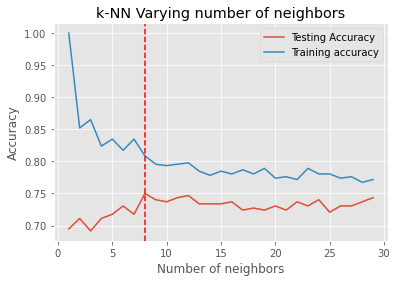

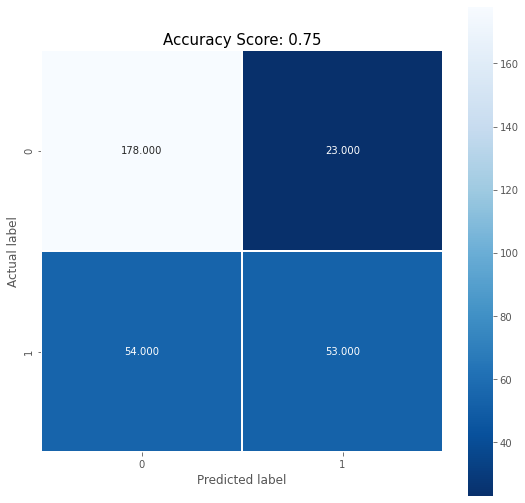

In [170]:
X = base_full.iloc[:,:-1]
y = base_full.iloc[:,-1]
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
#
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
#
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.axvline(x=8, color = 'r', linestyle = '--')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

#

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

#
y_pred = knn.predict(X_test)

#
cm = confusion_matrix(y_test,y_pred)

#

score = knn.score(X_test,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#
print('****************************************************************')
print(classification_report(y_test, y_pred))
print()
print('****************************************************************')

#

knn_prob = knn.predict_proba(X_test)
probs = knn_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

#
acuracia = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test,probs)
print('Acurácia: %f' % acuracia)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1-Score: %f' % f1)
print('Roc_auc_score: %f' % f1)
print()
print('****************************************************************')

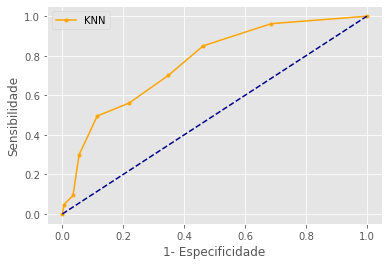

In [171]:
# Gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

### Analisando a base com Padronização

****************************************************************
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       201
           1       0.70      0.43      0.53       107

    accuracy                           0.74       308
   macro avg       0.72      0.67      0.67       308
weighted avg       0.73      0.74      0.72       308


****************************************************************
Acurácia: 0.737013
Precision: 0.696970
Recall: 0.429907
F1-Score: 0.531792
Roc_auc_score: 0.531792

****************************************************************


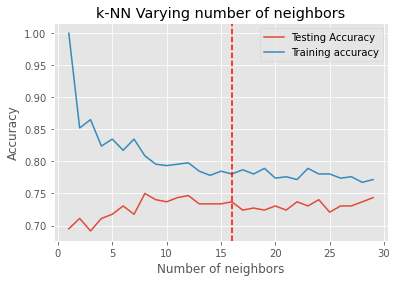

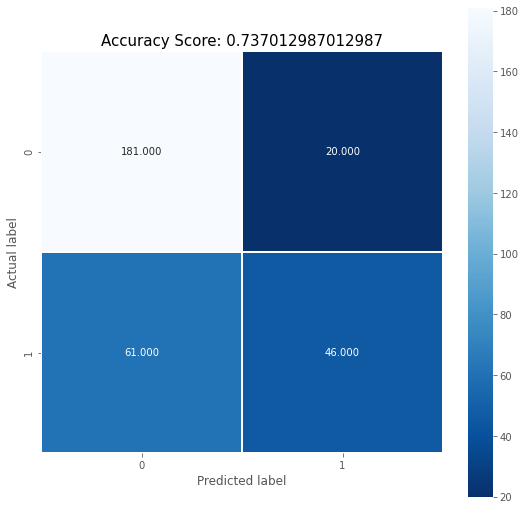

In [178]:
X = df_result_StandScaler.iloc[:,:-1]
y = df_result_StandScaler.iloc[:,-1]
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
#
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
#
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.axvline(x=16, color = 'r', linestyle = '--')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

#

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

#
y_pred = knn.predict(X_test)

#
cm = confusion_matrix(y_test,y_pred)

#

score = knn.score(X_test,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#
print('****************************************************************')
print(classification_report(y_test, y_pred))
print()
print('****************************************************************')

#

knn_prob = knn.predict_proba(X_test)
probs = knn_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

#
acuracia = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test,probs)
print('Acurácia: %f' % acuracia)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1-Score: %f' % f1)
print('Roc_auc_score: %f' % f1)
print()
print('****************************************************************')

In [ ]:
Analisando a base com Padronização e Normalização
Analisando a base com com Under e over